<a href="https://colab.research.google.com/github/OmkarSolat/Data-Science-in-DevTown/blob/main/DAY_44_Project_Decision_Tree_Regressor(Price_Prediction_of_used_Cars_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project - Price Prediction Of Used Cars

# Steps

1. Import libraries
2. Import the dataset
3. Perform Data Analysis & EDA
4. Spliting the data
5. [Optional] Data Preprocessing - Feature Scaling,...
6. Choosing a model - Decision Tree Regressor
7. Training the model
8. Testing the model
9. Checking the performance of the model

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Importing Dataset
Link: https://raw.githubusercontent.com/sahilrahman12/Price_prediction_of_used_Cars_-Predictive_Analysis-/master/car_data.csv

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/sahilrahman12/Price_prediction_of_used_Cars_-Predictive_Analysis-/master/car_data.csv')

# Data Analysis / EDA

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
df.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


In [ ]:
#dimentions
df.ndim

2

In [ ]:
df.shape

(4340, 8)

In [ ]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [ ]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
df.fuel.unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [ ]:
df.fuel.nunique()

5

In [ ]:
df.nunique()

name             1491
year               27
selling_price     445
km_driven         770
fuel                5
seller_type         3
transmission        2
owner               5
dtype: int64

* one hot encoders --->

In [ ]:
# Create a column new_fuel and place it at index of the fuel column
# Replace the values---->
# Petrol - 0
# Diesel - 1
# CNG - 2
# LPG - 3
# Electric - 4

x = df.fuel.replace({'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4})
df.insert(df.columns.get_loc('fuel'),'new_fuel',x)

In [ ]:
df.head()

,name,year,selling_price,km_driven,new_fuel,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,0,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,Diesel,Individual,Manual,Second Owner


In [ ]:
# Create a column new_seller_type and place it at index of the seller_type column
# Replace the values----->
# Individual - 0
# Dealer - 1
# Trustmark Dealer - 2

x = df.seller_type.replace({'Individual':0,'Dealer':1,'Trustmark Dealer':2})
df.insert(df.columns.get_loc("seller_type"),"new_seller_type",x)

In [ ]:
df.head()

,name,year,selling_price,km_driven,new_fuel,fuel,new_seller_type,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,Petrol,0,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,Petrol,0,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,Diesel,0,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,0,Petrol,0,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,Diesel,0,Individual,Manual,Second Owner


* Label encoders

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
df['fuel'] = LabelEncoder().fit_transform(df['fuel'])
df['seller_type'] = LabelEncoder().fit_transform(df['seller_type'])
df['transmission'] = LabelEncoder().fit_transform(df['transmission'])
df['owner'] = LabelEncoder().fit_transform(df['owner'])

In [ ]:
df.head()

,name,year,selling_price,km_driven,new_fuel,fuel,new_seller_type,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,4,0,1,1,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,4,0,1,1,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,0,1,1,0
3,Datsun RediGO T Option,2017,250000,46000,0,4,0,1,1,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,0,1,1,2


In [ ]:
# Create a column no_of_years = current year - year
df['current_year'] = 2021
df['no_of_years'] = df['current_year'] - df['year']

In [ ]:
df.head()

,name,year,selling_price,km_driven,new_fuel,fuel,new_seller_type,seller_type,transmission,owner,current_year,no_of_years
0,Maruti 800 AC,2007,60000,70000,0,4,0,1,1,0,2021,14
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,4,0,1,1,0,2021,14
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,0,1,1,0,2021,9
3,Datsun RediGO T Option,2017,250000,46000,0,4,0,1,1,0,2021,4
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,0,1,1,2,2021,7


In [ ]:
# Drop columns - name, year, cureent_year
# Rename selling_price to current_selling_price

df.drop(['name','year','current_year'],axis=1,inplace=True)
df.rename(columns={'selling_price':'current_selling_price'},inplace=True)

In [ ]:
df.head()

,current_selling_price,km_driven,new_fuel,fuel,new_seller_type,seller_type,transmission,owner,no_of_years
0,60000,70000,0,4,0,1,1,0,14
1,135000,50000,0,4,0,1,1,0,14
2,600000,100000,1,1,0,1,1,0,9
3,250000,46000,0,4,0,1,1,0,4
4,450000,141000,1,1,0,1,1,2,7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   current_selling_price  4340 non-null   int64
 1   km_driven              4340 non-null   int64
 2   new_fuel               4340 non-null   int64
 3   fuel                   4340 non-null   int64
 4   new_seller_type        4340 non-null   int64
 5   seller_type            4340 non-null   int64
 6   transmission           4340 non-null   int64
 7   owner                  4340 non-null   int64
 8   no_of_years            4340 non-null   int64
dtypes: int64(9)
memory usage: 305.3 KB


In [ ]:
df.corr()

,current_selling_price,km_driven,new_fuel,fuel,new_seller_type,seller_type,transmission,owner,no_of_years
current_selling_price,1.000000,-0.192289,0.226883,-0.269653,0.240666,-0.151554,-0.530205,-0.207840,-0.413922
km_driven,-0.192289,1.000000,0.274760,-0.286095,-0.187131,0.113689,0.120226,0.297115,0.419688
new_fuel,0.226883,0.274760,1.000000,-0.924521,0.011358,-0.029301,-0.027507,0.021907,-0.090388
fuel,-0.269653,-0.286095,-0.924521,1.000000,-0.024602,0.038797,0.039249,-0.010910,0.120002
new_seller_type,0.240666,-0.187131,0.011358,-0.024602,1.000000,-0.549928,-0.200191,-0.238281,-0.182458
seller_type,-0.151554,0.113689,-0.029301,0.038797,-0.549928,1.000000,0.174925,0.165681,0.098352
transmission,-0.530205,0.120226,-0.027507,0.039249,-0.200191,0.174925,1.000000,0.078893,0.143800
owner,-0.207840,0.297115,0.021907,-0.010910,-0.238281,0.165681,0.078893,1.000000,0.414705
no_of_years,-0.413922,0.419688,-0.090388,0.120002,-0.182458,0.098352,0.143800,0.414705,1.000000


<Axes: >

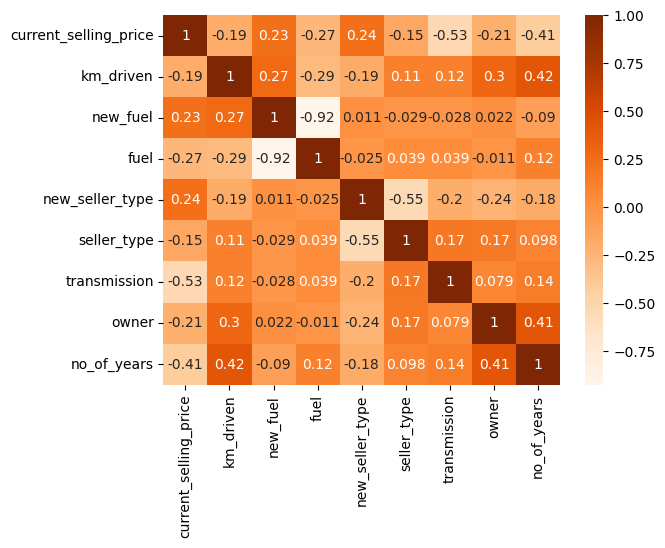

In [ ]:
# heatmap
sns.heatmap(df.corr(),annot=True,cmap='Oranges')

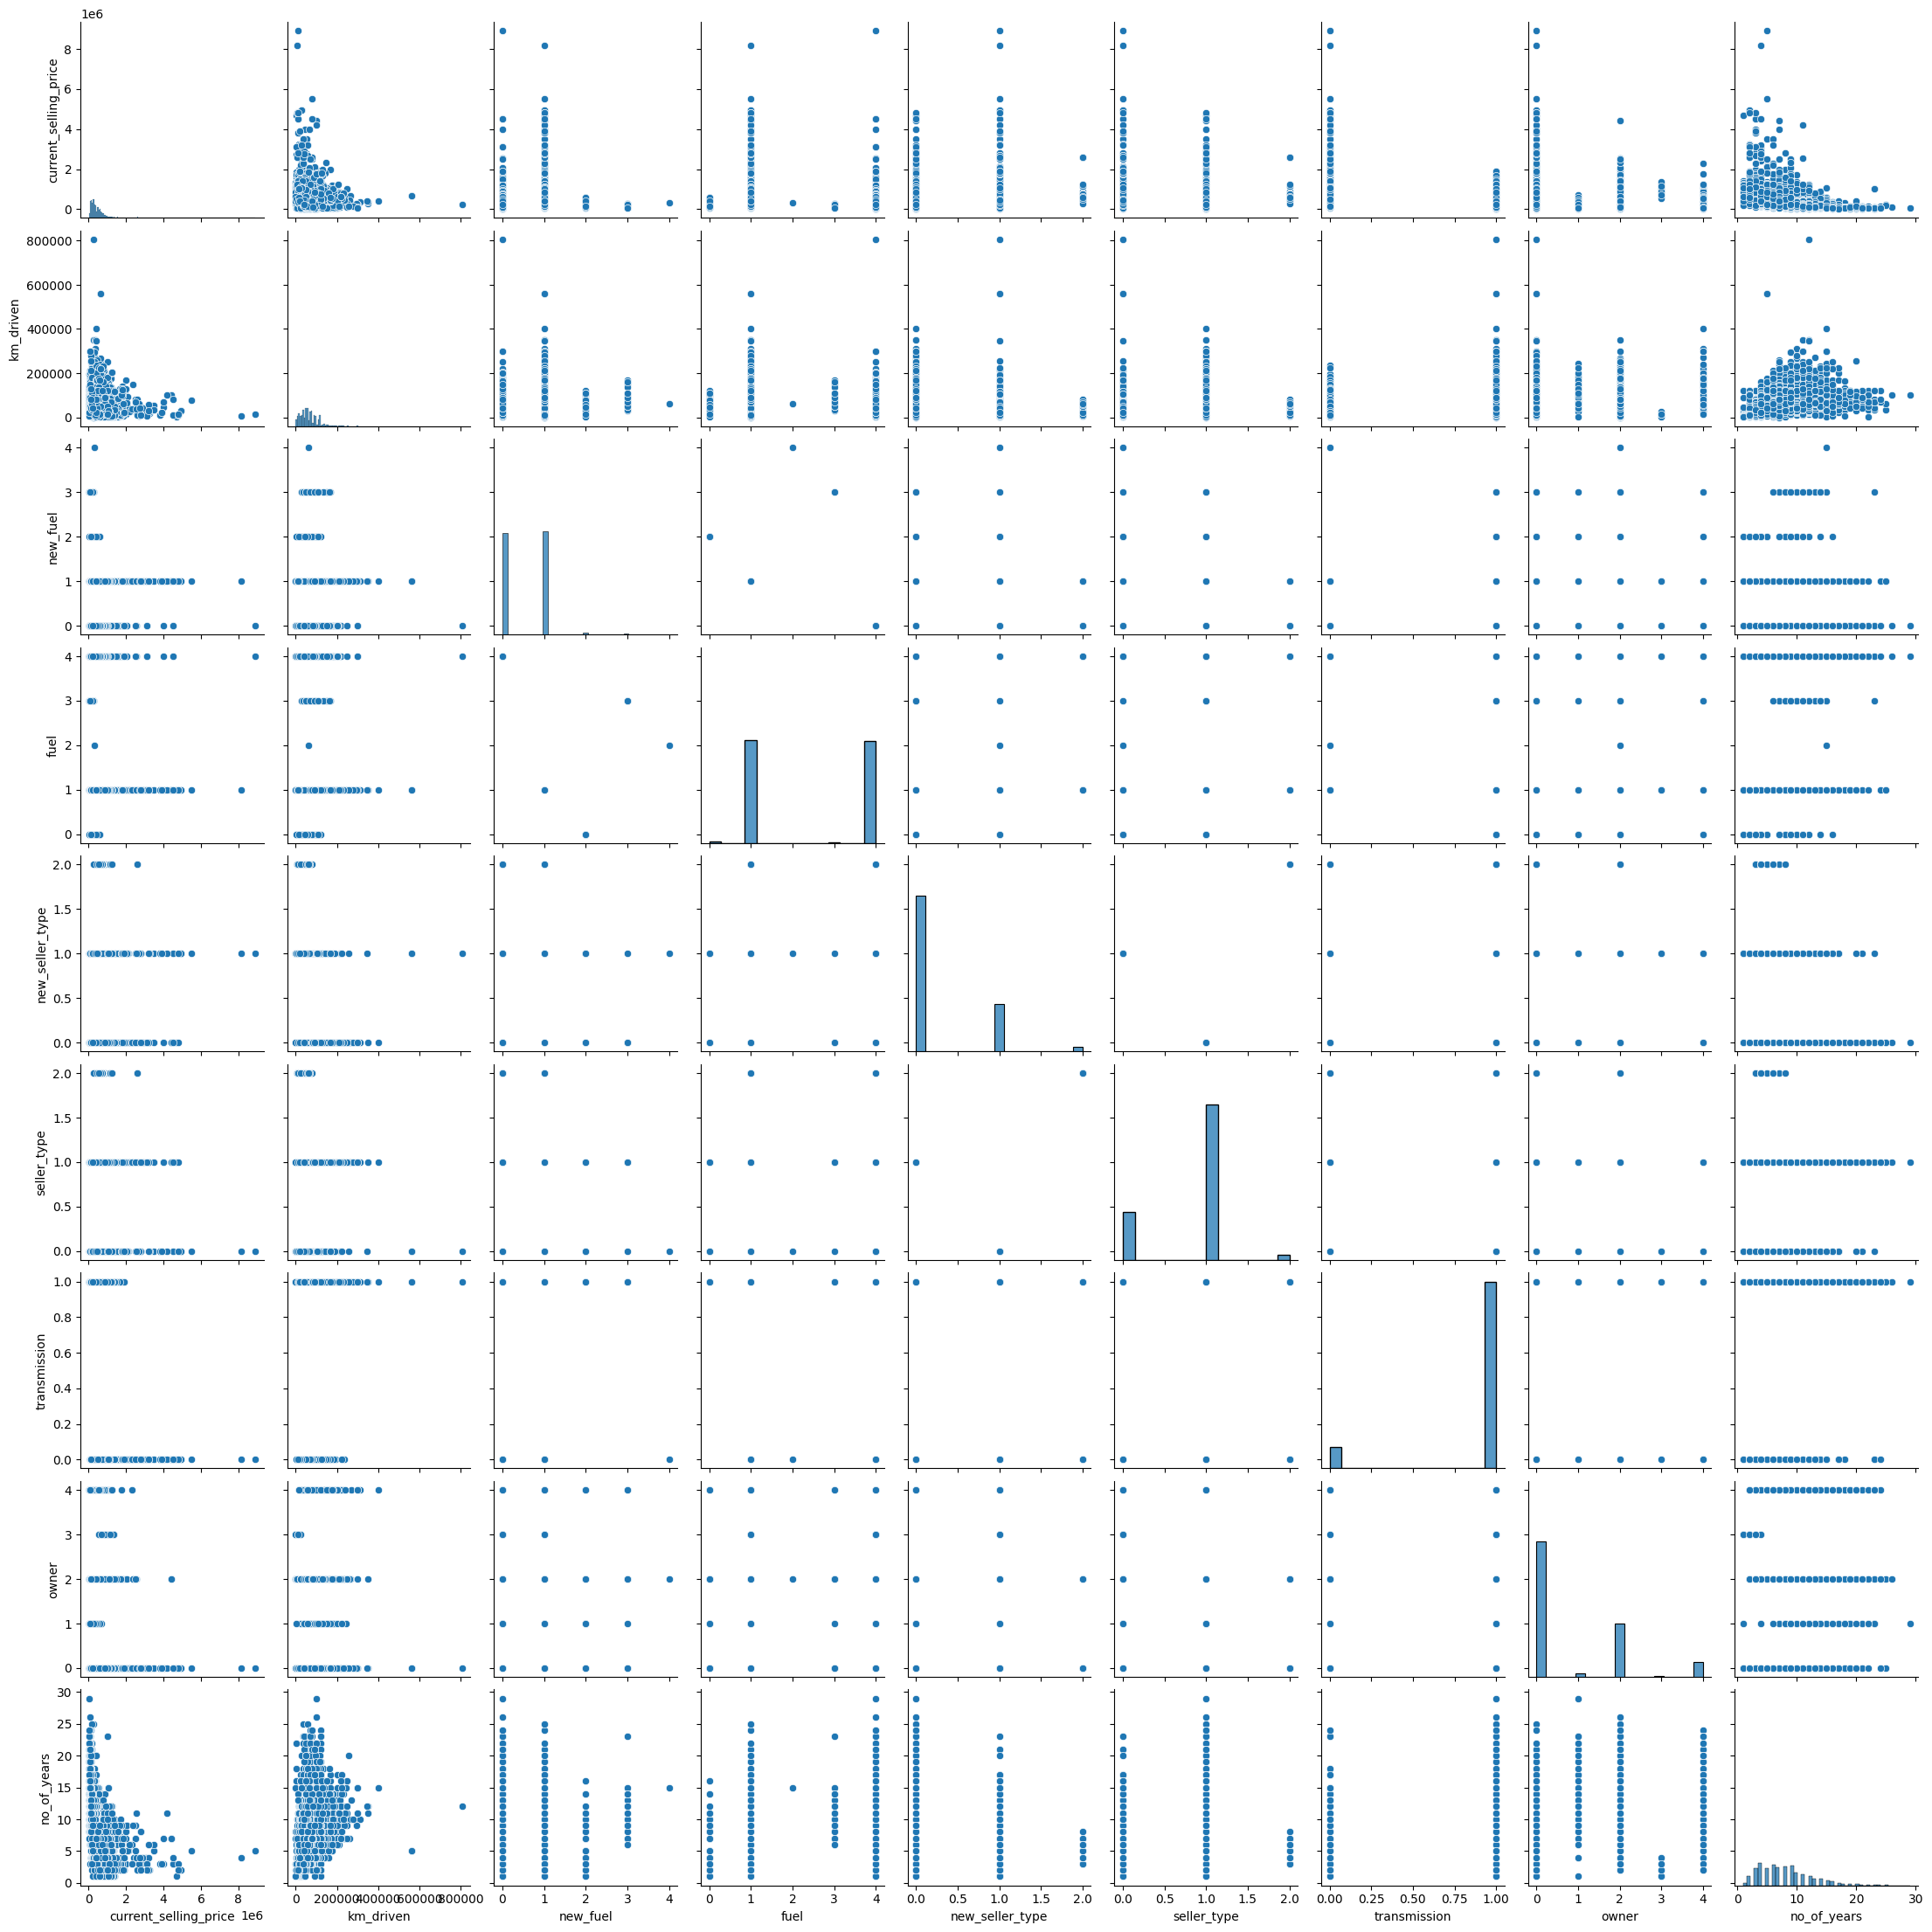

In [ ]:
#pairplot
sns.pairplot(df)

<Axes: >

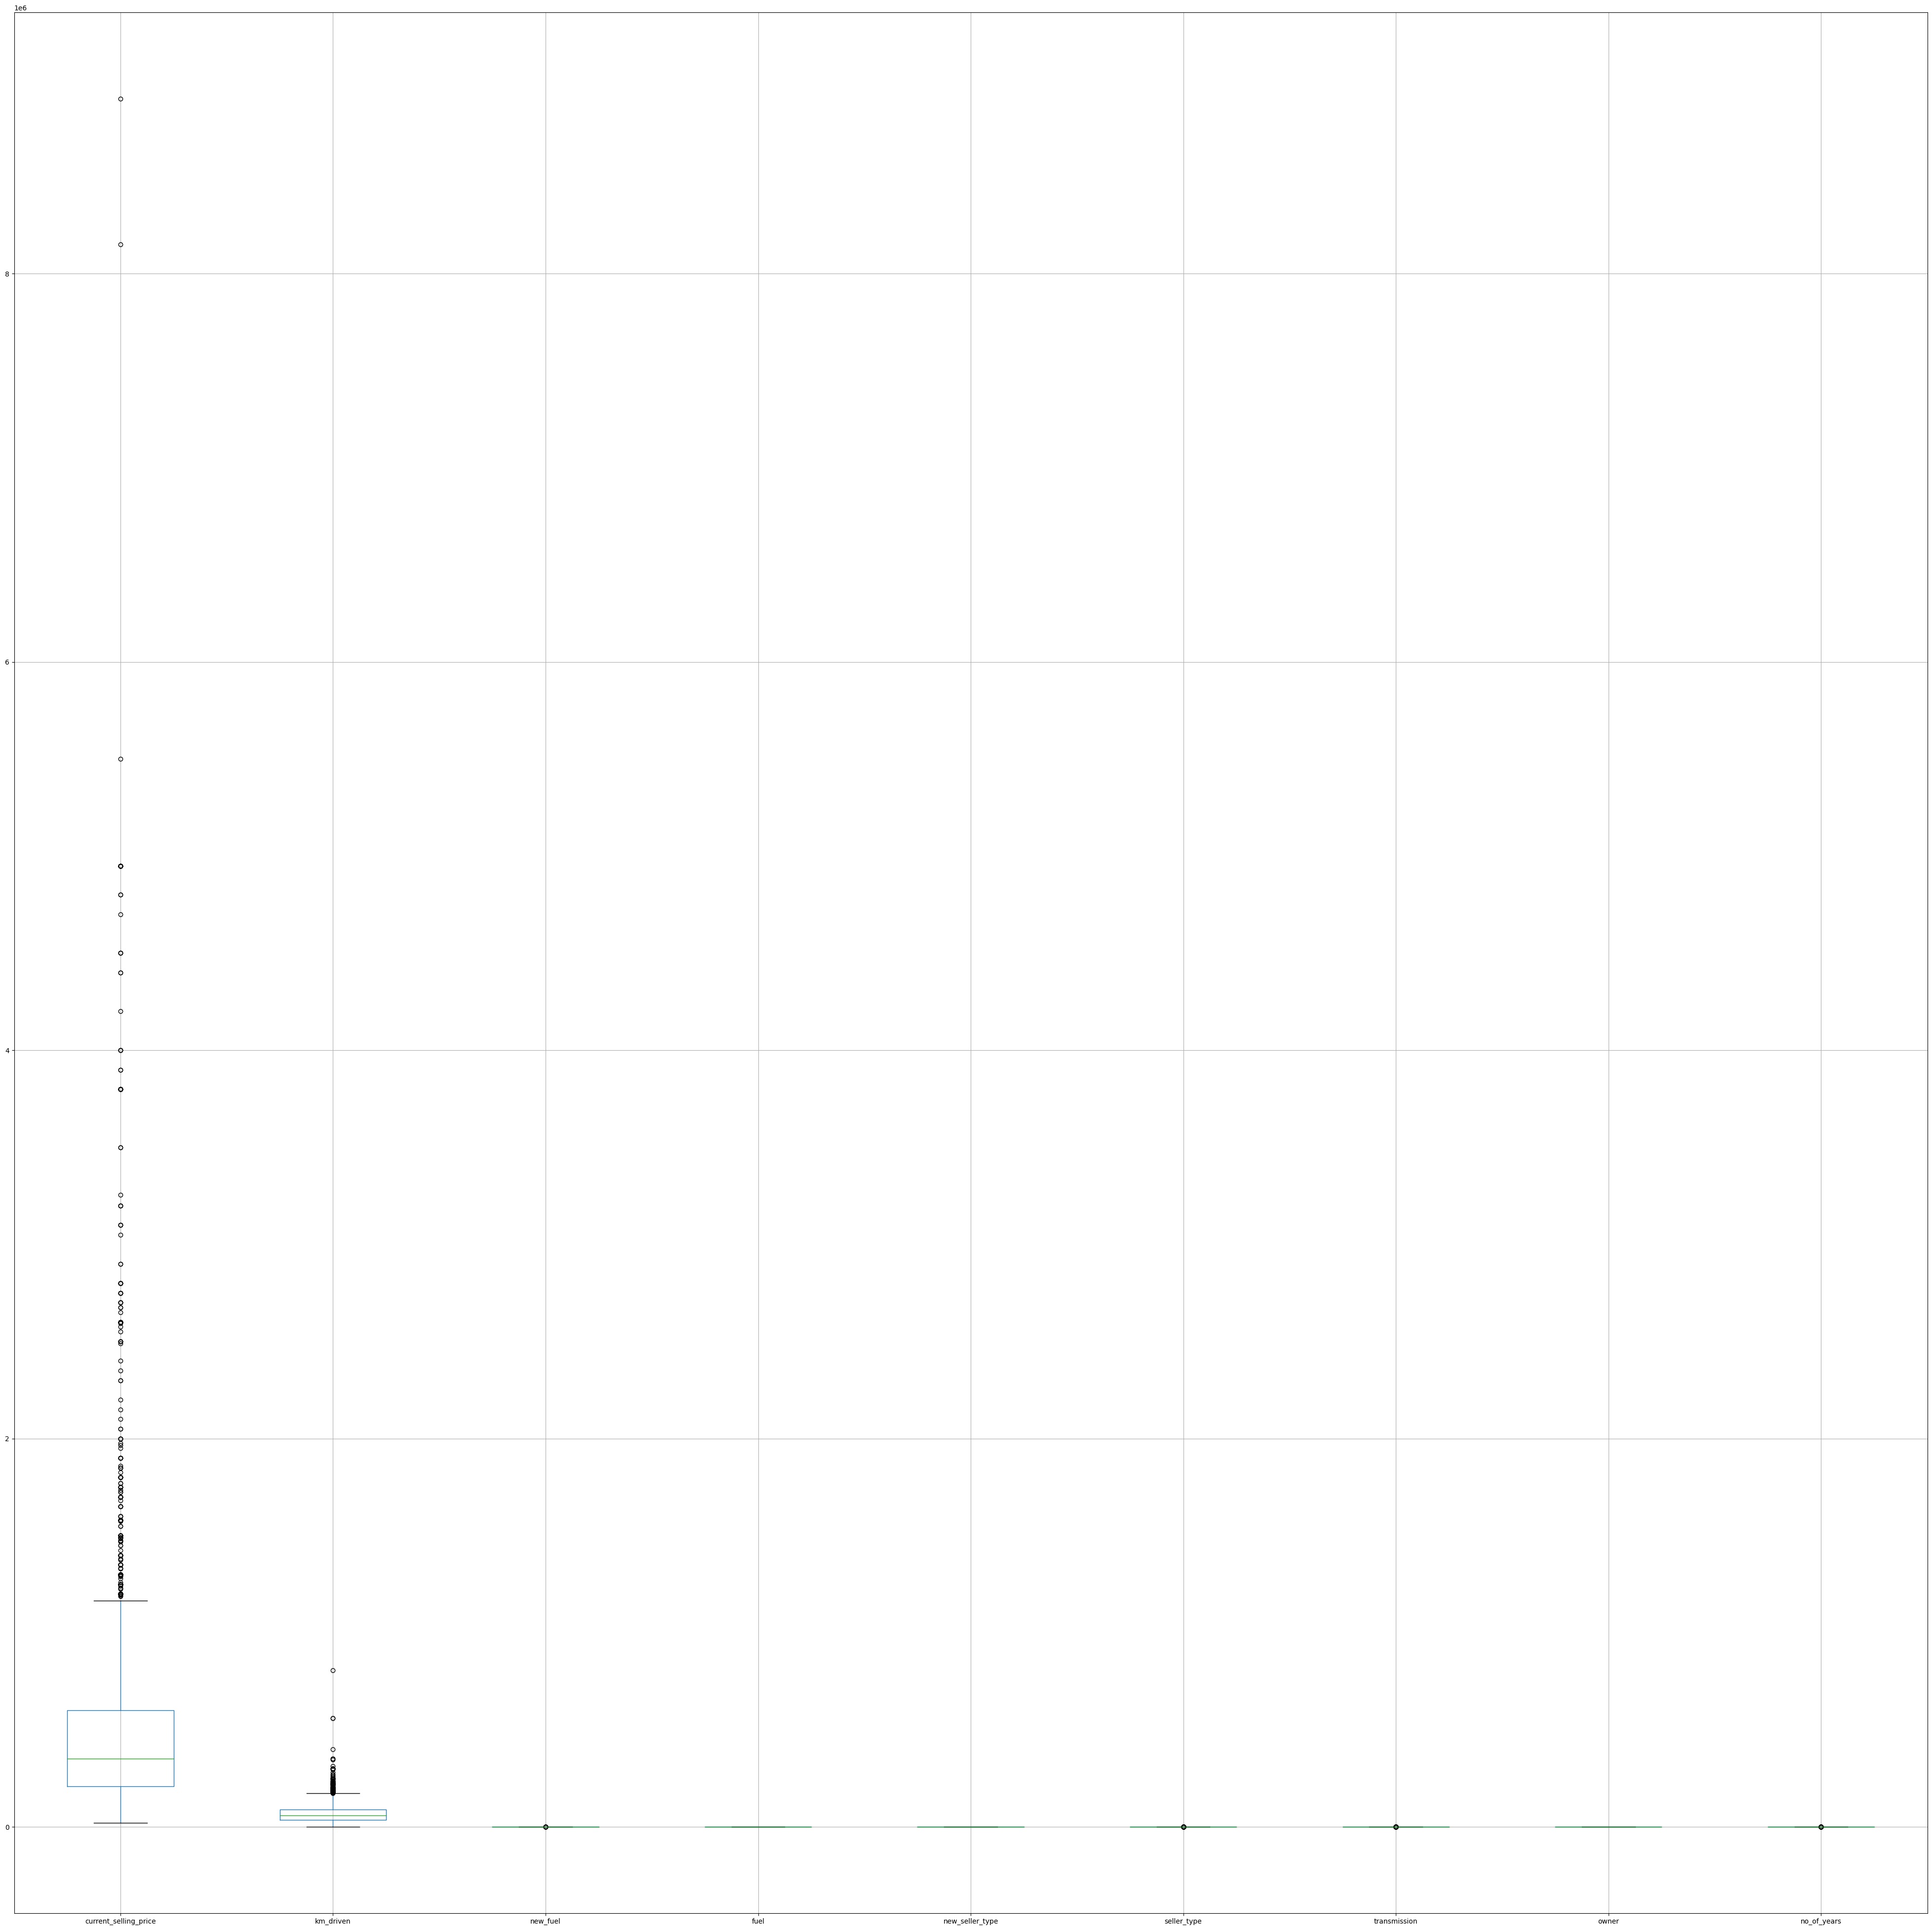

In [ ]:
#boxplot
plt.figure(figsize=(50,50))
df.boxplot()

# Select features & Targets

In [ ]:
X = np.array(df.drop('current_selling_price',axis=1))
y = np.array(df.current_selling_price)

In [ ]:
# TARGET =>>> Selling Price

# Spliting the Data

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
len(y_train)

3472

#Choosing the model

In [ ]:
regressor = DecisionTreeRegressor()

#Training the model

In [ ]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = regressor.predict(X_test)

# Testing the model

In [ ]:
target = pd.DataFrame({"Actual": y_test.reshape(-1), "Predicted": y_pred.reshape(-1)})

In [ ]:
target.head()

,Actual,Predicted
0,600000,715000.0
1,320000,300000.0
2,120000,245000.0
3,500000,1225000.0
4,150000,135000.0


<Axes: >

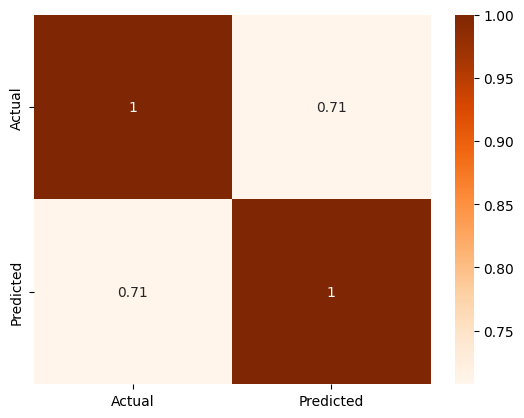

In [ ]:
#heatmap
sns.heatmap(target.corr(), annot=True, cmap='Oranges')

# Performance

In [ ]:
r2_score(y_test,y_pred)

0.4086167945972943